#LIBERARY

In [181]:
#---------------------------------------------------------------------------------------------->NUMPY
import numpy as np
#---------------------------------------------------------------------------------------------->PANDA
import pandas as pd
#---------------------------------------------------------------------------------------------->PLOTTING
import seaborn as sns
import matplotlib.pyplot as plt
#---------------------------------------------------------------------------------------------->GRID_SEARCH
from sklearn.model_selection import GridSearchCV
#---------------------------------------------------------------------------------------------->SCORE_FOR_REGRESSION
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score
#---------------------------------------------------------------------------------------------->SPLITTING_DATA
from sklearn.model_selection import train_test_split
#---------------------------------------------------------------------------------------------->ENCODING(LabelEncoder,OrdinalEncoder,OrdinalEncoder)
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OrdinalEncoder
#---------------------------------------------------------------------------------------------->REGRESSION_MODELS(LinearRegression)
from sklearn.linear_model import LinearRegression
import missingno as msng
#---------------------------------------------------------------------------------------------->statsmodels(PERFORM_LINEAR_REGRESSION)
import statsmodels.api as sm
#---------------------------------------------------------------------------------------------->EXCEPTION_WARNING
import warnings
warnings.filterwarnings("ignore")
#---------------------------------------------------------------------------------------------->RECURSIVE_FEATURE_SELECTION(RFE-WRAPPER)
from sklearn.feature_selection import RFE #recursive feature elimination
#---------------------------------------------------------------------------------------------->F_REGRESSION
from sklearn.feature_selection import SelectKBest,f_regression
#---------------------------------------------------------------------------------------------->CHI2
from sklearn.feature_selection import SelectKBest,chi2
#---------------------------------------------------------------------------------------------->MUTUAL_INFO_CLASSIFY
from sklearn.feature_selection import mutual_info_classif
#---------------------------------------------------------------------------------------------->ANNOVA_F_CLASSIFY
from sklearn.feature_selection import SelectKBest, f_classif
#---------------------------------------------------------------------------------------------->PCA
from sklearn.decomposition import PCA
#---------------------------------------------------------------------------------------------->TSNE
from sklearn.manifold import TSNE


#Read-data

In [ ]:
df=pd.read_csv('/content/US_Crime_Rates.csv')
df
# df =pd.read_excel('/content/TRIAL-1.xlsx',sheet_name='Sheet1')
# df.head()

#SPLIT_DATA

In [94]:
x=df.loc[:,df.columns != 'Total']
y=df['Total']

In [148]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=.2,random_state=42)

#PEARSON_CORRELATION(F1_REGRESSION)_(CLASSIFICATION_REGRESSION)

In [97]:
fsm=SelectKBest(f_regression,k=8)
fsm.fit(x_train ,y_train)

x_train_F_REG=fsm.transform(x_train)
x_valid_F_REG=fsm.transform(x_valid)
x_test_F_REG=fsm.transform(x_test)

# if you used a standard-scaler, the input will contain a negative values.
# and chi-square not work with negative so, apply minmaxscaler() instead.

##SELECTED_FEATURES

In [98]:
mask = fsm.get_support()
mask

array([False, False,  True,  True,  True,  True,  True,  True, False,
        True,  True])

In [99]:
selected_feature_names_F_REG = pd.DataFrame(x_train).columns[mask]
selected_feature_names_F_REG

Index(['Violent', 'Property', 'Murder', 'Forcible_Rape', 'Robbery',
       'Aggravated_assault', 'Larceny_Theft', 'Vehicle_Theft'],
      dtype='object')

In [101]:
fsm.get_feature_names_out()

array(['Violent', 'Property', 'Murder', 'Forcible_Rape', 'Robbery',
       'Aggravated_assault', 'Larceny_Theft', 'Vehicle_Theft'],
      dtype=object)

##APPLY_MODEL

In [102]:
param_grid_L={'fit_intercept': [True, False], 'positive': [True, False]}
G_L_REG = GridSearchCV(
            estimator=LinearRegression(),
           param_grid= param_grid_L)
grid_result_L= G_L_REG.fit(x_train_F_REG,y_train)
print(grid_result_L.best_params_)

{'fit_intercept': False, 'positive': True}


In [103]:
y_pred_test_L=grid_result_L.predict(x_test_F_REG)
score_test_L=r2_score(y_test,y_pred_test_L)*100
print("score_test_L_V for our test dataset with tuning is : {:.2f}%".format(score_test_L))

score_test_L_V for our test dataset with tuning is : 99.99%


#CHi-square(chi2)-(CLASSIFICATION_REGRESSION)

In [107]:
fsm=SelectKBest(chi2,k=8)#K=8 MEAN BEST OF CORRELATION OF FEATURES SELECTED
fsm.fit(x_train ,y_train)
x_train_selected_CHI2=fsm.transform(x_train)
x_valid_selected_CHI2=fsm.transform(x_valid)
x_test_selected_CHI2=fsm.transform(x_test)

# if you used a standard-scaler, the input will contain a negative values.
# and chi-square not work with negative so, apply minmaxscaler() instead.

In [108]:
mask = fsm.get_support()
mask

array([False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True])

In [109]:
selected_feature_names_CHI2 = pd.DataFrame(x_train).columns[mask]
selected_feature_names_CHI2

Index(['Population', 'Violent', 'Property', 'Robbery', 'Aggravated_assault',
       'Burglary', 'Larceny_Theft', 'Vehicle_Theft'],
      dtype='object')

In [110]:
param_grid_L={'fit_intercept': [True, False], 'positive': [True, False]}
G_L_REG = GridSearchCV(
            estimator=LinearRegression(),
           param_grid= param_grid_L)
grid_result_L= G_L_REG.fit(x_train_selected_CHI2,y_train)
print(grid_result_L.best_params_)

{'fit_intercept': True, 'positive': False}


In [111]:
y_pred_test_L=grid_result_L.predict(x_test_selected_CHI2)
score_test_L=r2_score(y_test,y_pred_test_L)*100
print("score_test_L_V for our test dataset with tuning is : {:.2f}%".format(score_test_L))

score_test_L_V for our test dataset with tuning is : 99.99%


#MUTUAL_INFORMATION_CLASSIFY (CLASSIFICATION)

In [ ]:
fsm=SelectKBest(mutual_info_classif,k=8)
fsm.fit(x_train ,y_train)
x_train_selected=fsm.transform(x_train)
x_valid_selected=fsm.transform(x_valid)
x_test_selected=fsm.transform(x_test)
# if you used a standard-scaler, the input will contain a negative values.
# and chi-square not work with negative so, apply minmaxscaler() instead.

In [ ]:
mask = fsm.get_support()
mask

array([False, False,  True,  True, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False, False])

In [ ]:
selected_feature_names = pd.DataFrame(x_train).columns[mask]
selected_feature_names

Int64Index([2, 3, 6, 7, 20, 22, 23, 27], dtype='int64')

In [ ]:
# df.columns[list(selected_feature_names)]
df.drop('diagnosis',axis=1).columns[list(selected_feature_names)]

Index(['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')

In [ ]:
# fsm.get_feature_names_out()

#ANNOVA(f_classif)_CLASSIFICATION

In [ ]:
fsm=SelectKBest(f_classif,k=8)
fsm.fit(x_train ,y_train)
x_train_selected=fsm.transform(x_train)
x_valid_selected=fsm.transform(x_valid)
x_test_selected=fsm.transform(x_test)
# if you used a standard-scaler, the input will contain a negative values.
# and chi-square not work with negative so, apply minmaxscaler() instead.

In [ ]:
mask = fsm.get_support()
mask

array([ True, False,  True, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False, False])

In [ ]:
selected_feature_names = pd.DataFrame(x_train).columns[mask]
selected_feature_names

Int64Index([0, 2, 6, 7, 20, 22, 23, 27], dtype='int64')

In [ ]:
# df.columns[list(selected_feature_names)]
df.drop('diagnosis',axis=1).columns[list(selected_feature_names)]

Index(['radius_mean', 'perimeter_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')

In [ ]:
# fsm.get_feature_names_out()

#(RFE) Wrapper(REGRESSION)

In [136]:
wrapper = RFE(LinearRegression(), n_features_to_select=8)
wrapper.fit(x_train,y_train)
y_pred_WRAPPER=wrapper.predict(x_test)
score_test_L=r2_score(y_test,y_pred_WRAPPER)*100
print("score_test_L_V for our test dataset with tuning is : {:.2f}%".format(score_test_L))
## will give error as svc hasen't importance so we can use LinearSVC Insteas

score_test_L_V for our test dataset with tuning is : 99.99%


##USING_IN_SVC_THE_LINEARSVC_WITH (RFE)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE #recursive feature elimination
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
svc_L=LinearSVC(C=10)
wrapper = RFE(svc_L, n_features_to_select=8)

wrapper.fit(x_train,y_train)
y_pred=wrapper.predict(x_test)

print(f'the accuracy = {accuracy_score(y_test,y_pred)}')
print(f'the recall = {recall_score(y_test,y_pred,)}')
print(f'the precision = {precision_score(y_test,y_pred)}')
print(f'the f1 = {f1_score(y_test,y_pred)}')

In [ ]:
# #for forward
# from sklearn.feature_selection import SequentialFeatureSelector
# sfs = SequentialFeatureSelector(estimator=clf, n_features_to_select=10, direction='forward')

# #for backword
# from sklearn.feature_selection import SequentialFeatureSelector
# sfs = SequentialFeatureSelector(estimator=clf, n_features_to_select=10, direction='backward')

#Embedded

In [ ]:
# Embedded feature selection methods refer to those that perform feature selection during the model training process. The three main types of embedded feature selection methods are:

# Lasso Regression
# Ridge Regression
# Elastic Net Regression

#PCA(CLASSIFICATION_REGRESSION)

In [ ]:
# recommended to use standard-scaler
# scaler=StandardScaler()
# x_train=scaler.fit_transform(x_train)
# x_valid=scaler.transform(x_valid)
# x_test=scaler.transform(x_test)

##PCA With best k value

Number of components to keep: 1


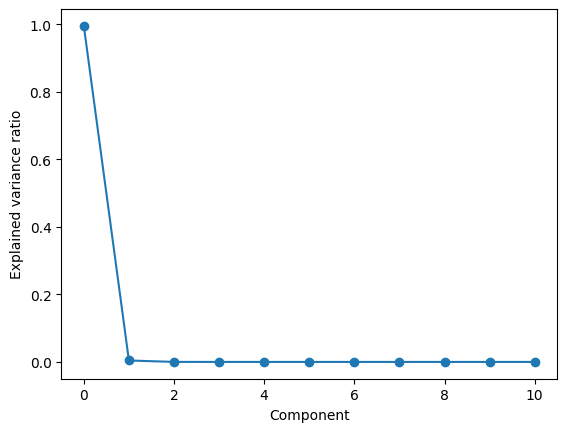

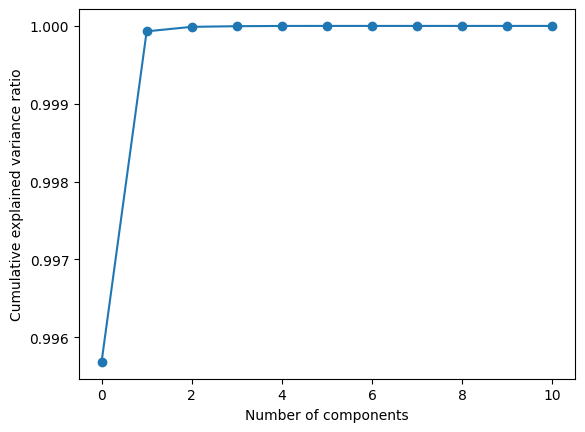

In [ ]:
# Create a PCA object with the desired number of components
pca = PCA()

# Fit the PCA object to the training data and transform both the training and test data
x_train_pca = pca.fit_transform(x_train)
x_valid_pca = pca.transform(x_valid)
x_test_pca = pca.transform(x_test)

# Determine number of components to keep
explained_var_ratio = pca.explained_variance_ratio_

# cumulative sum of the explained variance ratios
cumulative_var_ratio = np.cumsum(explained_var_ratio)

#to find the index of the first cumulative variance ratio that is greater than or equal to 0.95,
#and we add 1 to get the actual number of components to keep.
n_components = np.argmax(cumulative_var_ratio >= 0.95) + 1
print(f"Number of components to keep: {n_components}")

# Plot explained variance ratio
plt.plot(explained_var_ratio, marker='o')
plt.xlabel('Component')
plt.ylabel('Explained variance ratio')
plt.show()

# Plot cumulative explained variance ratio
plt.plot(cumulative_var_ratio, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.show()

In [167]:
# Create a PCA object with the desired number of components
pca = PCA(n_components=2)
# Fit the PCA object to the training data and transform both the training and test data
x_train_pca = pca.fit_transform(x_train)
x_valid_pca = pca.transform(x_valid)
x_test_pca = pca.transform(x_test)

In [168]:
param_grid_L={'fit_intercept': [True, False], 'positive': [True, False]}
G_L_REG = GridSearchCV(
            estimator=LinearRegression(),
           param_grid= param_grid_L)
grid_result_L= G_L_REG.fit(x_train_pca,y_train)
print(grid_result_L.best_params_)

{'fit_intercept': True, 'positive': True}


In [169]:
y_pred_test_L=grid_result_L.predict(x_test_pca)
score_test_L=r2_score(y_test,y_pred_test_L)*100
print("score_test_L_V for our test dataset with tuning is : {:.2f}%".format(score_test_L))

score_test_L_V for our test dataset with tuning is : 99.83%


#TSNE(CLASSIFICATION_REGRESSION)

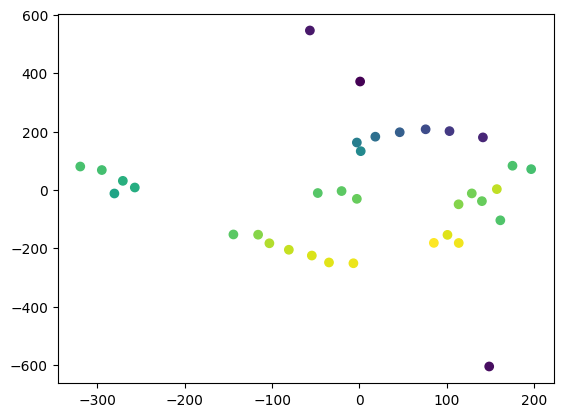

In [180]:
tsne = TSNE(n_components=2, perplexity=3)#perplexity=30 to control the effective number of neighbors used in the algorithm.

# Fit the TSNE object to the data and transform the data
x_train_pca = tsne.fit_transform(x_train)
x_valid_pca = tsne.fit_transform(x_valid)
x_test_pca = tsne.fit_transform(x_test)

# Plot the 2D t-SNE visualization
plt.scatter(x_train_pca[:,0], x_train_pca[:,1], c=y_train)
plt.show()

#'TSNE' object has no attribute 'transform'